<a href="https://colab.research.google.com/github/deea-c/thesis_absa/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/code
!pwd



/content/drive/MyDrive/Colab Notebooks/code
/content/drive/MyDrive/Colab Notebooks/code


In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

files = glob.glob("results/*")
files

['results/English_evaluation_results.csv',
 'results/French_evaluation_results.csv',
 'results/English + French_evaluation_results.csv',
 'results/dutch_evaluation_results.csv']

In [ ]:
sns.__version__

'0.12.2'

In [ ]:
def read_df(path):
  df = pd.read_csv(path)
  return df

In [ ]:
english_results = read_df("./results/English_evaluation_results.csv")
french_results = read_df("results/French_evaluation_results.csv")
french_english_results = read_df("results/English + French_evaluation_results.csv")
dutch_results = read_df("results/dutch_evaluation_results.csv")

In [ ]:
results_df = pd.concat([ english_results, french_results, french_english_results, dutch_results], keys = [ "english" ,"french" ,"french_english" ,"dutch"] , names =["dataset", "index"]  ).reset_index()

results_df["model"] = results_df["Model"].replace({"xlm-roberta-base":"XLM-R", "bert-base-multilingual-cased" : "mBERT", "GroNLP/bert-base-dutch-cased": "BERTje"	 })

In [ ]:
results_df

,dataset,index,Model,Fold,train_eval_negative_precision,train_eval_negative_recall,train_eval_negative_f1,train_eval_negative_number,train_eval_neutral_precision,train_eval_neutral_recall,...,dutch_test_eval_neutral_number,dutch_test_eval_positive_precision,dutch_test_eval_positive_recall,dutch_test_eval_positive_f1,dutch_test_eval_positive_number,dutch_test_eval_overall_precision,dutch_test_eval_overall_recall,dutch_test_eval_overall_f1,dutch_test_eval_overall_accuracy,model
0,english,0,bert-base-multilingual-cased,1,0.338462,0.060440,0.102564,364,0.000000,0.000000,...,23,0.279113,0.656522,0.391699,230,0.281307,0.415550,0.335498,0.873890,mBERT
1,english,1,xlm-roberta-base,1,0.071429,0.002747,0.005291,364,0.000000,0.000000,...,23,0.262948,0.286957,0.274428,230,0.262948,0.176944,0.211538,0.900000,XLM-R
2,english,2,bert-base-multilingual-cased,2,0.314286,0.030137,0.055000,365,0.000000,0.000000,...,23,0.198473,0.339130,0.250401,230,0.197970,0.209115,0.203390,0.884325,mBERT
3,english,3,xlm-roberta-base,2,0.700000,0.019178,0.037333,365,0.000000,0.000000,...,23,0.296029,0.356522,0.323471,230,0.294964,0.219839,0.251920,0.902049,XLM-R
4,english,4,bert-base-multilingual-cased,3,0.103448,0.008287,0.015345,362,0.000000,0.000000,...,23,0.206831,0.473913,0.287979,230,0.206831,0.292225,0.242222,0.867229,mBERT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,dutch,5,GroNLP/bert-base-dutch-cased,6,0.419492,0.322476,0.364641,307,0.000000,0.000000,...,23,0.439655,0.665217,0.529412,230,0.415049,0.458445,0.435669,0.926469,BERTje
66,dutch,6,GroNLP/bert-base-dutch-cased,7,0.520599,0.449838,0.482639,309,0.666667,0.042553,...,23,0.487500,0.678261,0.567273,230,0.446650,0.482574,0.463918,0.927427,BERTje
67,dutch,7,GroNLP/bert-base-dutch-cased,8,0.467354,0.415902,0.440129,327,0.400000,0.023256,...,23,0.441176,0.652174,0.526316,230,0.397260,0.466488,0.429100,0.922635,BERTje
68,dutch,8,GroNLP/bert-base-dutch-cased,9,0.404255,0.444816,0.423567,299,0.000000,0.000000,...,23,0.505190,0.634783,0.562620,230,0.427184,0.471850,0.448408,0.924688,BERTje


In [ ]:
plot_df = results_df[["dataset","model","dutch_test_eval_overall_f1","test_eval_overall_f1"]]

In [ ]:
plot_df.groupby(["dataset","model"]).agg('mean')

dutch_test_eval_overall_f1  test_eval_overall_f1
dataset        model                                                   
dutch          BERTje                    0.442276              0.442276
english        XLM-R                     0.246399              0.498908
               mBERT                     0.249984              0.507628
french         XLM-R                     0.222676              0.255281
               mBERT                     0.152965              0.291956
french_english XLM-R                     0.378093              0.472364
               mBERT                     0.288246              0.464790

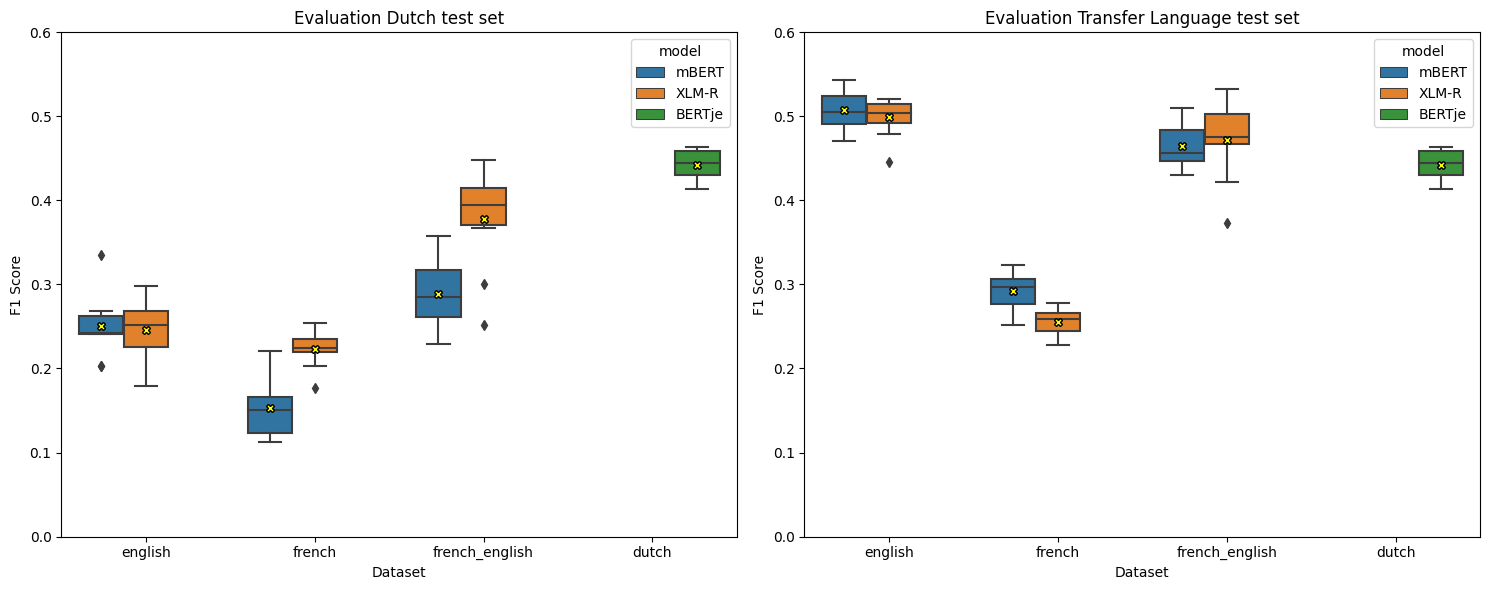

In [ ]:
# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Boxplot for Dutch test set evaluation
sns.boxplot(x='dataset', y='dutch_test_eval_overall_f1', hue = "model", data=results_df, ax=axes[0], showmeans=True, meanprops={"marker":"X", "markerfacecolor": "yellow", "markeredgecolor":"black"})
axes[0].set_xlabel("Dataset")
axes[0].set_ylabel('F1 Score')
axes[0].set_title(f'Evaluation Dutch test set')
axes[0].set_ylim(0,0.6)
# Boxplot for language test set evaluation
sns.boxplot(x='dataset', y='test_eval_overall_f1',hue ="model", data=results_df, ax=axes[1], showmeans=True,  meanprops={"marker":"X", "markerfacecolor": "yellow", "markeredgecolor":"black"})
axes[1].set_xlabel("Dataset")
axes[1].set_ylabel('F1 Score')
axes[1].set_title(f'Evaluation Transfer Language test set')
axes[1].set_ylim(0,0.6)
# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

# Show the plot
plt.show()

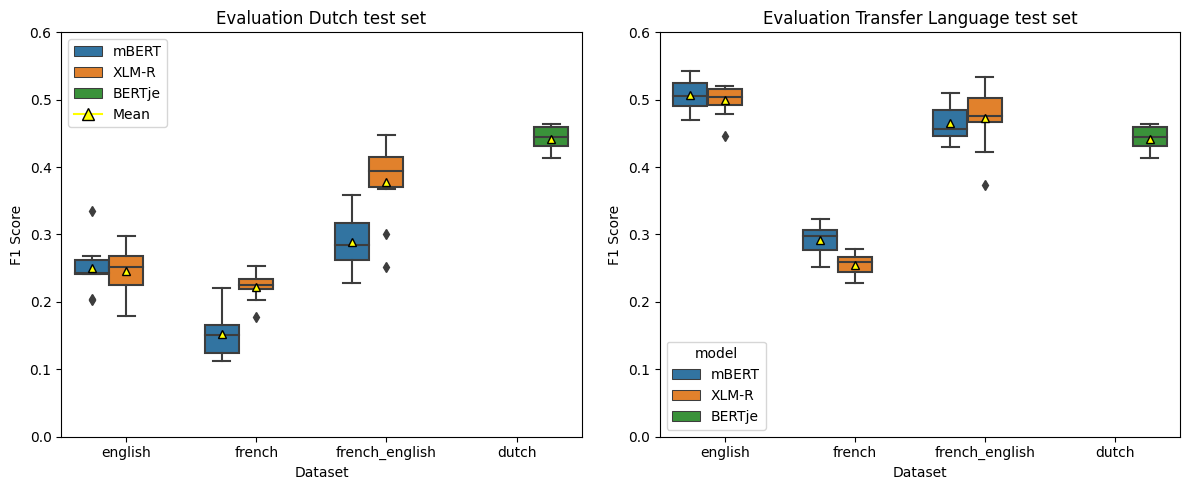

In [ ]:
# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Define the color for the mean elements
mean_color = 'yellow'

# Boxplot for Dutch test set evaluation
sns.boxplot(x='dataset', y='dutch_test_eval_overall_f1', hue="model", data=results_df, ax=axes[0], showmeans=True, meanprops={"marker":"^", "markerfacecolor": mean_color, "markeredgecolor":'black'})
axes[0].set_xlabel("Dataset")
axes[0].set_ylabel('F1 Score')
axes[0].set_title(f'Evaluation Dutch test set')
axes[0].set_ylim(0,0.6)  # Set x-axis limits to match the second subplot

# Boxplot for language test set evaluation
sns.boxplot(x='dataset', y='test_eval_overall_f1', hue="model", data=results_df, ax=axes[1], showmeans=True, meanprops={"marker":"^", "markerfacecolor": mean_color, "markeredgecolor":"black"})
axes[1].set_xlabel("Dataset")
axes[1].set_ylabel('F1 Score')
axes[1].set_title(f'Evaluation Transfer Language test set')
axes[1].set_ylim(0,0.6)  # Set x-axis limits to match the first subplot

# Create a legend element for the mean
mean_legend = plt.Line2D([], [], marker='^', color=mean_color, label='Mean', markerfacecolor=mean_color, markeredgecolor= 'black', markersize=8)

# Add the mean legend to the plot
handles, labels = axes[0].get_legend_handles_labels()
handles.append(mean_legend)
labels.append('Mean')
axes[0].legend(handles, labels)

# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

# Show the plot
plt.show()


In [ ]:
results_df.columns

Index(['dataset', 'index', 'Model', 'Fold', 'train_eval_negative_precision',
       'train_eval_negative_recall', 'train_eval_negative_f1',
       'train_eval_negative_number', 'train_eval_neutral_precision',
       'train_eval_neutral_recall', 'train_eval_neutral_f1',
       'train_eval_neutral_number', 'train_eval_positive_precision',
       'train_eval_positive_recall', 'train_eval_positive_f1',
       'train_eval_positive_number', 'train_eval_overall_precision',
       'train_eval_overall_recall', 'train_eval_overall_f1',
       'train_eval_overall_accuracy', 'val_eval_negative_precision',
       'val_eval_negative_recall', 'val_eval_negative_f1',
       'val_eval_negative_number', 'val_eval_neutral_precision',
       'val_eval_neutral_recall', 'val_eval_neutral_f1',
       'val_eval_neutral_number', 'val_eval_positive_precision',
       'val_eval_positive_recall', 'val_eval_positive_f1',
       'val_eval_positive_number', 'val_eval_overall_precision',
       'val_eval_overall_reca

In [ ]:
avg_results_df = results_df.groupby(["dataset",'model']).agg('mean', numeric_only = True).reset_index()

In [ ]:
avg_results_df.to_csv("avg_results.csv")

In [ ]:
dutch_test_df = avg_results_df[["dataset",'model','dutch_test_eval_negative_precision',
       'dutch_test_eval_negative_recall', 'dutch_test_eval_negative_f1',
       'dutch_test_eval_neutral_precision',
       'dutch_test_eval_neutral_recall', 'dutch_test_eval_neutral_f1',
       'dutch_test_eval_positive_precision',
       'dutch_test_eval_positive_recall', 'dutch_test_eval_positive_f1',
        'dutch_test_eval_overall_precision',
       'dutch_test_eval_overall_recall', 'dutch_test_eval_overall_f1']]
dutch_test_df

,dataset,model,dutch_test_eval_negative_precision,dutch_test_eval_negative_recall,dutch_test_eval_negative_f1,dutch_test_eval_neutral_precision,dutch_test_eval_neutral_recall,dutch_test_eval_neutral_f1,dutch_test_eval_positive_precision,dutch_test_eval_positive_recall,dutch_test_eval_positive_f1,dutch_test_eval_overall_precision,dutch_test_eval_overall_recall,dutch_test_eval_overall_f1
0,dutch,BERTje,0.278381,0.203333,0.222668,0.0,0.0,0.0,0.464346,0.650435,0.539657,0.420738,0.466488,0.442276
1,english,XLM-R,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.295218,0.348261,0.317403,0.293402,0.214745,0.246399
2,english,mBERT,0.112307,0.021667,0.034109,0.0,0.0,0.0,0.220658,0.467826,0.299373,0.217357,0.295442,0.249984
3,french,XLM-R,0.040680,0.027500,0.032582,0.0,0.0,0.0,0.345179,0.307391,0.322449,0.256440,0.198391,0.222676
4,french,mBERT,0.037890,0.037500,0.037335,0.0,0.0,0.0,0.202498,0.233913,0.213693,0.151178,0.156300,0.152965
5,french_english,XLM-R,0.222202,0.218333,0.218422,0.0,0.0,0.0,0.453035,0.500000,0.471727,0.381255,0.378552,0.378093
6,french_english,mBERT,0.156358,0.184167,0.167035,0.0,0.0,0.0,0.316704,0.411739,0.357081,0.267569,0.313137,0.288246


In [ ]:
dutch_test_df = dutch_test_df.melt( id_vars=["dataset",'model'])

In [ ]:
dutch_test_df['variable'] = dutch_test_df['variable'].apply(lambda x: '_'.join(x.split('_')[3:]))

dutch_test_df['polarity'] = dutch_test_df['variable'].str.split('_').str[0]
dutch_test_df['measure'] = dutch_test_df['variable'].str.split('_').str[1]

In [ ]:
custom_order = ["negative", "neutral",'positive', 'overall']
cust_o_metrics = ['precision','recall', 'f1']
dutch_test_df.pivot_table(index=['dataset', 'model'], columns=['polarity', "measure"], values='value').applymap(lambda x: "{:.2%}".format(x)).reindex(columns = custom_order, level = 0).reindex(columns = cust_o_metrics, level = 1)

polarity               negative                   neutral                \
measure               precision  recall      f1 precision recall     f1   
dataset        model                                                      
dutch          BERTje    27.84%  20.33%  22.27%     0.00%  0.00%  0.00%   
english        XLM-R      0.00%   0.00%   0.00%     0.00%  0.00%  0.00%   
               mBERT     11.23%   2.17%   3.41%     0.00%  0.00%  0.00%   
french         XLM-R      4.07%   2.75%   3.26%     0.00%  0.00%  0.00%   
               mBERT      3.79%   3.75%   3.73%     0.00%  0.00%  0.00%   
french_english XLM-R     22.22%  21.83%  21.84%     0.00%  0.00%  0.00%   
               mBERT     15.64%  18.42%  16.70%     0.00%  0.00%  0.00%   

polarity               positive                   overall                  
measure               precision  recall      f1 precision  recall      f1  
dataset        model                                                       
dutch          BERTje    46.43%  65.04%  53.97%    42.07%  46.65%  44.23%  
english        XLM-R     29.52%  34.83%  31.74%    29.34%  21.47%  24.64%  
               mBERT     22.07%  46.78%  29.94%    21.74%  29.54%  25.00%  
french         XLM-R     34.52%  30.74%  32.24%    25.64%  19.84%  22.27%  
               mBERT     20.25%  23.39%  21.37%    15.12%  15.63%  15.30%  
french_english XLM-R     45.30%  50.00%  47.17%    38.13%  37.86%  37.81%  
               mBERT     31.67%  41.17%  35.71%    26.76%  31.31%  28.82%

In [ ]:
tf_test_df = avg_results_df[["dataset",'model','test_eval_negative_precision',
       'test_eval_negative_recall', 'test_eval_negative_f1',
       'test_eval_neutral_precision',
       'test_eval_neutral_recall', 'test_eval_neutral_f1',
       'test_eval_positive_precision',
       'test_eval_positive_recall', 'test_eval_positive_f1',
        'test_eval_overall_precision',
       'test_eval_overall_recall', 'test_eval_overall_f1']]
tf_test_df = tf_test_df.melt( id_vars=["dataset",'model'])
tf_test_df['variable'] = tf_test_df['variable'].apply(lambda x: '_'.join(x.split('_')[2:]))

tf_test_df['polarity'] = tf_test_df['variable'].str.split('_').str[0]
tf_test_df['measure'] = tf_test_df['variable'].str.split('_').str[1]

In [ ]:
tf_test_df

,dataset,model,variable,value,polarity,measure
0,dutch,BERTje,negative_precision,0.278381,negative,precision
1,english,XLM-R,negative_precision,0.402873,negative,precision
2,english,mBERT,negative_precision,0.213449,negative,precision
3,french,XLM-R,negative_precision,0.120495,negative,precision
4,french,mBERT,negative_precision,0.150560,negative,precision
...,...,...,...,...,...,...
79,english,mBERT,overall_f1,0.507628,overall,f1
80,french,XLM-R,overall_f1,0.255281,overall,f1
81,french,mBERT,overall_f1,0.291956,overall,f1
82,french_english,XLM-R,overall_f1,0.472364,overall,f1


In [ ]:
tf_test_df.pivot_table(index=['dataset', 'model'], columns=['polarity', "measure"], values='value').applymap(lambda x: "{:.2%}".format(x)).reindex(columns = custom_order, level = 0).reindex(columns = cust_o_metrics, level = 1)

polarity               negative                   neutral                \
measure               precision  recall      f1 precision recall     f1   
dataset        model                                                      
dutch          BERTje    27.84%  20.33%  22.27%     0.00%  0.00%  0.00%   
english        XLM-R     40.29%   2.44%   4.36%     0.00%  0.00%  0.00%   
               mBERT     21.34%   4.96%   7.76%     0.00%  0.00%  0.00%   
french         XLM-R     12.05%  15.24%  13.42%     0.00%  0.00%  0.00%   
               mBERT     15.06%  17.79%  16.21%     0.00%  0.00%  0.00%   
french_english XLM-R     30.90%  34.64%  32.58%     0.00%  0.00%  0.00%   
               mBERT     30.38%  32.62%  31.41%     0.00%  0.00%  0.00%   

polarity               positive                   overall                  
measure               precision  recall      f1 precision  recall      f1  
dataset        model                                                       
dutch          BERTje    46.43%  65.04%  53.97%    42.07%  46.65%  44.23%  
english        XLM-R     47.90%  68.95%  56.51%    47.60%  52.45%  49.89%  
               mBERT     50.29%  68.20%  57.88%    49.25%  52.41%  50.76%  
french         XLM-R     27.20%  49.48%  34.99%    21.78%  30.89%  25.53%  
               mBERT     32.72%  51.60%  39.90%    26.22%  32.98%  29.20%  
french_english XLM-R     48.75%  65.68%  55.91%    43.66%  51.50%  47.24%  
               mBERT     50.10%  62.54%  55.60%    44.28%  48.94%  46.48%